<a href="https://colab.research.google.com/github/princy-ui/llm-chatbot/blob/main/Updated_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement your first ML model!

We will be doing the following:
1. Build the DataFrame
2. Define the ML Problem
3. Perform exploratory data analysis to understand your data
4. Prepare the data for your model
5. Fit your model to the training data and evaluate your model
6. Improve your model's performance

Let's jump right in!

In [ ]:
# Import the necessary libraries
import pandas as pd #pandas is a Python library commonly used for data analysis
import numpy as np #numpy is a Python library for numerical computing, specifically arrays and matrices
import os #os is "operating system"
import matplotlib.pyplot as plt #matplotlob is a Python library used for graphing, but its interface can we difficult to work with
import seaborn as sns #we use seaborn for a more user-friendly interface to create plots and graphs

# Step 1: Build the DataFrame

In [ ]:
# We will use a popular data set that contains census data

from google.colab import drive
drive.mount('/content/drive')
adultDataSet_filename = "/content/drive/MyDrive/adult.csv" #creates a path so our computer knows where to go to retrieve the file

Mounted at /content/drive


In [ ]:
# Use pandas read_csv method to read the file and store it in the DataFrame df
#dataframes are a data type unique to pandas. They are similar to spreadsheets or tables
df = pd.read_csv(adultDataSet_filename)

df.head() # prints out the first 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#if we wanted to see the first x rows, we could do something like this:
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,country,salary
0,39,Not-self-emp,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,0
1,50,Self-emp,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,13,United-States,0
2,38,Not-self-emp,HS-grad,9,Not-married,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,0
3,53,Not-self-emp,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,40,United-States,0
4,28,Not-self-emp,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,40,Cuba,0
5,37,Not-self-emp,Masters,14,Married,Exec-managerial,Wife,White,Female,0,40,United-States,0
6,49,Not-self-emp,9th,5,Married,Other-service,Not-in-family,Black,Female,0,16,Jamaica,0
7,52,Self-emp,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,45,United-States,1
8,31,Not-self-emp,Masters,14,Not-married,Prof-specialty,Not-in-family,White,Female,14084,50,United-States,1
9,42,Not-self-emp,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,40,United-States,1


# Step 2: Define the ML Problem



*   What are we predicting? \
The thing we are predicting in a ML problem is called the 'label.' In this case, we are predicting the income of a given individual. So, our label is the "salary" category.

*   What type of ML problem is this? \
There are 2 types of ML problems: supervised and unsupervised. [Link to useful article: https://www.geeksforgeeks.org/supervised-unsupervised-learning/] \\
We are working with a label, so it is supervised. Further, this is a binary classification problem because we have a binary label (salary is either <=50k or >50k)



*   What are features in a supervised learning problem? \\
Features are all the other columns except the label. Question: what are the features in this problem?
*   Why might this model be useful?


# Step 3: Explore your data

First, let us inspect the data set by looking at the shape, columns, data types, unique values, null values, etc.

In [ ]:
#this data set identifies missing values wiht ?, let's replace it with nan
df = df.replace('?', np.nan)

/tmp/ipython-input-1417325148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


In [ ]:
#check to see if our data set contains any missing values using the numpy "sum" method and the df "isnull" method
np.sum(df.isnull())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
#inspect the data types of each feature
df.dtypes

,0
age,int64
workclass,object
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object
capital-gain,int64


**Handle Missing Values**
Notice how the two categories with missing values, country and occupation, are both of type object. We cannot fill in these values because they are categorical, so we will remove them from the data set

In [ ]:
# Drop the null occupation and country examples
# Cannot replace them with means as they are of type object
df = df.dropna(subset=['occupation', 'country'])

print("Number of examples with missing occupation:", np.sum(df['occupation'].isnull(), axis = 0))
print("Number of examples with missing country:", np.sum(df['country'].isnull(), axis = 0))

Number of examples with missing occupation: 0
Number of examples with missing country: 0


In [ ]:
print(np.sum(df.isna()))

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
hours-per-week    0
country           0
salary            0
dtype: int64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


**Perform Feature Engineering**

In [ ]:
# inspect the numbers of rows and columns in the data set using the pandas "shape" method
df.shape

(30162, 13)

In [ ]:
# Inspect the label
df['salary']

,salary
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


**Analysis**: Notice how the two values for "salary" are: <=50K and >50K, which are strings (or objects). ML models work well with numbers rather than strings. So, it might make sense to change our label so that it is a numerical. How?

In [ ]:
# Inspect the data types of each column
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


**Analysis**: Again, notice how many of the columns are of type "object". We will need to change them to numerical values.

In [ ]:
# Tells you the number of unique values in each column
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [ ]:
# TODO: Display the number of unique values in the "salary" column using the unique() method

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# Get some important statistical information about the data set
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


 We now have a good sense of our data. We know the type, number of unique values, and number of null values for each column. \
 Further, we know that we will need to convert the object columns to numerical representations.
We are now ready to perform these steps to prepare our data for the modeling process!

# Step 4: Prepare the data for the model

In [ ]:
# Import some more libraries
#sklearn stands for "Scikit-learn". It is a Python library with functionality for building many kinds of ML models.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


**Adjust the label values** \\
As our label is not a numerical type, we can use a technique called one-hot encoding. It will replace the categorical values with 0s and 1s. \\
Learn more here: https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [ ]:
# Use map() to change the values
df.loc[:, 'salary'] = df['salary'].map({'<=50K': 0, '>50K': 1})
df['salary'].unique()

array([0, 1], dtype=object)

In [ ]:
df.head(15) #note that the salary column now only has 0's and 1's

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# **Create binary variables**
Some of the columns have too many unique values. A few of these can be turned into binary categories in order to reduce the number of columns that will be produced when we subsequently one-hot encode these features



First, we will change workclass. It can be grouped into Self-emp and Not-self-emp

In [ ]:
# Identify values for the first category and change them
#there are two different classes of not employed, "not-inc" and "inc", so we don't want either of these values for non-self-employed individuals
columns_not_self_employed = ~(df['workclass'] == 'Self-emp-not-inc') & ~(df['workclass'] == 'Self-emp-inc')
condition = columns_not_self_employed
#we now use the numpy "where" method that replaces values that meet condition with 'Not-self'emp'
df['workclass'] = np.where(condition, 'Not-self-emp', df['workclass'])

# Identify values for the second category and change them
condition = (df['workclass'] == 'Self-emp-not-inc')| (df['workclass'] == 'Self-emp-inc') #note how this condition is the opposite of the previous one
#similarly, we use the numpy "where" method again
df['workclass'] = np.where(condition, 'Self-emp', df['workclass'])

df['workclass'].unique() #let's now inspect our unique values of workclass to see the changes

array(['Not-self-emp', 'Self-emp'], dtype=object)

Now, let's change marital.status. It can be grouped into Married and Not-married.

In [ ]:
#TODO: Display the number of unique values in the "marital-status" column

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
# Identify values for the first category and change them
columns_not_married = (df['marital-status'] == 'Never-married') | (df['marital-status'] == 'Divorced') | (df['marital-status'] == 'Separated') | (df['marital-status'] == 'Widowed')
condition = columns_not_married
df['marital-status'] = np.where(condition, 'Not-married', df['marital-status'])

# Identify values for the second category and change them
columns_married = (df['marital-status'] == 'Married-civ-spouse') | (df['marital-status'] == 'Married-spouse-absent') | (df['marital-status'] == 'Married-AF-spouse')
condition = columns_married
df['marital-status'] = np.where(condition, 'Married', df['marital-status'])

df['marital-status'].unique() #let's see our changes

array(['Not-married', 'Married'], dtype=object)

In [ ]:
df.head() #let's see all of the above changes. Now, one-hot encoding will be much easier

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,Not-self-emp,77516,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Not-self-emp,215646,HS-grad,9,Not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Not-self-emp,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Not-self-emp,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


**Remove irrelevant features**
We will inspect the correlation between the features and our label (salary) to determine whether they are relevant. Question: Why might this be important?

In [ ]:
# We will now use a correlation matrix to determine the correlation between each numerical feature and all the other numerical features so we drop the categorical features
correlation_matrix = df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']).corr()

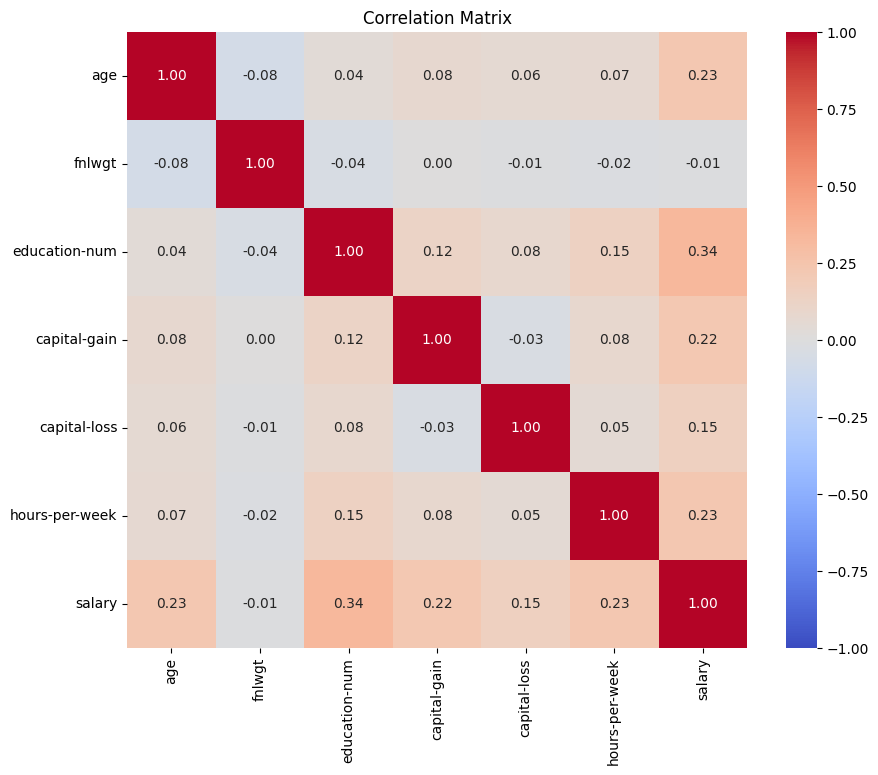

In [ ]:
# we now plot the above correlation matrix using the seaborn "heatmap" to give us a nice visual
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Specifically, we want to see how closely correlated each feature is with our label
print(correlation_matrix['salary'].sort_values())

fnlwgt           -0.009463
capital-loss      0.150526
capital-gain      0.223329
hours-per-week    0.229689
age               0.234037
education-num     0.335154
salary            1.000000
Name: salary, dtype: float64


**Analysis**: fnlwgt and capital.loss are very weakly correlated to income. So, we will not use those columns moving forward. This will make our model simpler.

In [ ]:
# Drop the irrelevant columns from the dataset
df = df.drop(columns=['fnlwgt', 'capital-loss'])
df.head(10)

KeyError: "['fnlwgt', 'capital-loss'] not found in axis"

**One-hot encoding** \
Now, let's perform feature engineering on the categorical features.

In [ ]:
to_encode = list(df.select_dtypes(include=['object']).columns) #all of the object columns need to be converted into numerical format
to_encode.remove('salary') #we don't want to change salary
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [ ]:
# TODO: Display the number of unique values in "to_encode" using the nunique() method

,0
workclass,2
education,16
marital-status,2
occupation,15
relationship,6
race,5
sex,2
country,42


Now that we have identified the features to be encoded, we will now one-hot encode all of the above features. \
One hot encoding creates 1 new column for each category of the feature there is. It then puts a 1 in that column if the row has it, and a 0 for all other columns

Only for country we will just encode the top 10, as there are too many categories otherwise. Let's do that first.

In [ ]:
# Identify top 10 country values
top_10_NC = list(df['country'].value_counts().head(10).index) #value_counts gives us how many rows there are of each country

top_10_NC

['United-States',
 'Mexico',
 'Philippines',
 'Germany',
 'Puerto-Rico',
 'Canada',
 'El-Salvador',
 'India',
 'Cuba',
 'England']

In [ ]:
# Loop over the list and perform one-hot encoding for each value
for value in top_10_NC:
    df['country_'+ value] = np.where(df['country']==value,1,0)
    #we add an "_value" to the name of the column to indicate what country it is

df.drop(columns = 'country', inplace=True) #now we drop the original country column, as we no longer need it

KeyError: 'country'

In [ ]:
df.head(20) #note the names of the country columns now

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,ountry_United-States,ountry_Mexico,ountry_Philippines,ountry_Germany,ountry_Puerto-Rico,ountry_Canada,ountry_El-Salvador,ountry_India,ountry_Cuba,ountry_England
0,39,Not-self-emp,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Male,2174,...,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,38,Not-self-emp,HS-grad,9,Not-married,Handlers-cleaners,Not-in-family,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
3,53,Not-self-emp,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,...,1,0,0,0,0,0,0,0,0,0
4,28,Not-self-emp,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,0,0,0,1,0
5,37,Not-self-emp,Masters,14,Married,Exec-managerial,Wife,White,Female,0,...,1,0,0,0,0,0,0,0,0,0
6,49,Not-self-emp,9th,5,Married,Other-service,Not-in-family,Black,Female,0,...,0,0,0,0,0,0,0,0,0,0
7,52,Self-emp,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
8,31,Not-self-emp,Masters,14,Not-married,Prof-specialty,Not-in-family,White,Female,14084,...,1,0,0,0,0,0,0,0,0,0
9,42,Not-self-emp,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

In [ ]:
# Remove native.country as it's encoded already
to_encode.remove('country')
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [ ]:
# Perform one-hot encoding using the pandas "get_dummies" method which automates the above process we performed for the countries
df = pd.get_dummies(df, columns=to_encode)
df.columns #note how many columns we have now as a result of the one-hot encoding

Index(['age', 'education-num', 'capital-gain', 'hours-per-week', 'salary',
       'ountry_United-States', 'ountry_Mexico', 'ountry_Philippines',
       'ountry_Germany', 'ountry_Puerto-Rico', 'ountry_Canada',
       'ountry_El-Salvador', 'ountry_India', 'ountry_Cuba', 'ountry_England',
       'workclass_Not-self-emp', 'workclass_Self-emp', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married',
       'marital-status_Not-married', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Mach

In [ ]:
df.head()

,age,education-num,capital-gain,hours-per-week,salary,ountry_United-States,ountry_Mexico,ountry_Philippines,ountry_Germany,ountry_Puerto-Rico,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,13,2174,40,0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,50,13,0,13,0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,38,9,0,40,0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
3,53,7,0,40,0,1,0,0,0,0,...,False,False,False,False,False,True,False,False,False,True
4,28,13,0,40,0,0,0,0,0,0,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
df.shape

(30162, 62)

**Analysis**: Notice how we now have 62 columns! \
**Next Step: Scaling**\
Now, we scale the data. This ensures that the scale of a feature (ex. if its values range from 1-5 or 1,000-5,000) does not affect its weight on our predictions. For example, a feature with a bigger range could disproportionately affect predictions. This ensures more accurate predictions.

In [ ]:
scaler = StandardScaler()
to_scale = ['age', 'education-num', 'capital-gain', 'hours-per-week'] #we scale these columns that have big ranges

for column in to_scale:
    df[column] = scaler.fit_transform(df[[column]])

df.dtypes

,0
age,float64
education-num,float64
capital-gain,float64
hours-per-week,float64
salary,int64
...,...
race_Black,bool
race_Other,bool
race_White,bool
sex_Female,bool


# Step 5: Train your model

In [ ]:
# TODO: Define X and y. X are the features (inputs to the model) and y is the label (output of the model)
X = df.drop('salary', axis = 1)
y = df['salary']

In [ ]:
y = df['salary'].astype(int) #we want to interpret salary as an integer, not a boolean
print(y.dtype)

int64


Create training and test data sets. We use a test size of 30%, meaning that 70% of the data is used for training, and 30% is used for testing. Random state provides a start for the randomly generated split between train and testing rows. This ensures that each time you run the function, it will produce the same output, as we gave it a set starting point.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

Train a default Logistic Regression model. Logistic Regression fits a line of best fit matching features values to the label

In [ ]:
# TODO: Initialize a LR model
model_default = LogisticRegression(max_iter=1000, C=1.0)

# TODO: Fit the model to the training data
model_default.fit(X_train, y_train)

# Make predictions
proba_predictions_default = model_default.predict_proba(X_test)[:, 1] #this predicts the probability that the label has a value 1
class_label_predictions_default = model_default.predict(X_test) #this predicts the actual value of the label

# Create a confusion matrix to view our true positives, false positives, true negatives, and false negatives
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])

pd.DataFrame(
c_m,
columns=['Predicted: salary <=50K', 'Predicted: salary >50K'],
index=['Actual: salary <=50K', 'Actual: salary >50K']
)


,Predicted: salary <=50K,Predicted: salary >50K
Actual: salary <=50K,1355,893
Actual: salary >50K,482,6319


In [ ]:
# Make a grid of different values of parameters for logistic regression
cs=[10**i for i in range(-5,5)]
param_grid = {'C':cs}

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [ ]:
#perform a grid search to systematically train and test logistic regression models with different combinations of hyperparameter values
#Note: This may take a minute or two to run
print('Running Grid Search...')

model = LogisticRegression(max_iter=1000)

grid = GridSearchCV(model, param_grid, cv=5) #the actual GridSearch step

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [ ]:
# Determine best hyperparameter value
best_C = grid.best_params_['C']

best_C

0.1

Train an optimized Logistic Regression model.

In [ ]:
# TODO: Initialize a LR model with best_C value
model_best = LogisticRegression(C=best_C, max_iter = 1000)

# TODO: Fit model to training data
model_best.fit(X_test, y_test)

# Make predictions
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
class_label_predictions_best = model_best.predict(X_test)

# Create confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

pd.DataFrame(
c_m,
columns=['Predicted: income <=50K', 'Predicted: income >50K'],
index=['Actual: income <=50K', 'Actual: income >50K']
)

,Predicted: income <=50K,Predicted: income >50K
Actual: income <=50K,1354,894
Actual: income >50K,456,6345


**Analysis**: There is a slight improvement in the predictions. There are fewer false negatives and higher true positives.

In [ ]:
# prompt: determine the accuracy of the default vs the optimized LR models we have created above

# TODO: Calculate accuracy for the default model
accuracy_default = accuracy_score(y_test, class_label_predictions_default)
print(f"Accuracy of the default Logistic Regression model: {accuracy_default}")

# TODO: Calculate accuracy for the optimized model
accuracy_best = accuracy_score(y_test, class_label_predictions_best)
print(f"Accuracy of the optimized Logistic Regression model: {accuracy_best}")

Accuracy of the default Logistic Regression model: 0.8480495082329539
Accuracy of the optimized Logistic Regression model: 0.8508122444469002
